In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib.cm as cm

In [5]:

col_pue = 'PUE Rate'         
col_capex = 'CapEx Rate'     
col_potential = 'Ele Potential' 
target_value = 10             

# Setup Theme
sns.set_theme(style="ticks", context="talk")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']


def plot_gradient_contours(scenarios_dict):
    fig, ax = plt.subplots(figsize=(12, 8), dpi=150)
    ax.grid(True, linestyle='--', alpha=0.5, color='#d9d9d9', zorder=0)

    # --- COLOR SETUP ---
    cmap_name = 'viridis' 
    cmap = plt.get_cmap(cmap_name)
    num_scenarios = len(scenarios_dict)
    colors = [cmap(i) for i in np.linspace(0, 0.99, num_scenarios)]

    lines = []
    labels = []

    for idx, (name, df) in enumerate(scenarios_dict.items()):
        color = colors[idx]
        
        xi = np.linspace(df[col_pue].min(), df[col_pue].max(), 500)
        yi = np.linspace(df[col_capex].min(), df[col_capex].max(), 500)
        Xi, Yi = np.meshgrid(xi, yi)
        Zi = griddata((df[col_pue], df[col_capex]), df[col_potential], (Xi, Yi), method='linear')
        
        # Plot Contour
        cs = ax.contour(Xi, Yi, Zi, levels=[target_value], 
                        colors=[color], 
                        linewidths=3, 
                        zorder=3)
        
        # --- 修复点在这里 ---
        # 直接对 cs 对象应用 path_effects，而不再调用 .collections
        plt.setp(cs, path_effects=[pe.withStroke(linewidth=5, foreground="white")])

        lines.append(plt.Line2D([0], [0], color=color, linewidth=3))
        labels.append(name)

    # --- Base Case Marker ---
    ax.scatter([1.0], [1.0], color='black', s=120, marker='+', zorder=5, linewidth=2, label='Base Case')
    ax.text(1.02, 1.02, 'Real Case', fontsize=11, color='black', weight='bold')

    sns.despine(trim=True, offset=10)
    ax.set_title(f'Comparison of {target_value} PWh/yr Potential Boundaries', fontsize=18, pad=20, weight='bold')
    ax.set_xlabel('PUE Ratio (vs. Real Case)', fontsize=18)
    ax.set_ylabel('CapEx Ratio (vs. Real Case)', fontsize=18)
    
    legend = ax.legend(lines, labels, title='Scenarios', 
                       loc='center left', bbox_to_anchor=(1, 0.5),
                       frameon=False)
    legend._legend_box.align = "left"

    plt.tight_layout()
    
    plt.savefig('./data/fig/Vis/ecosens.jpg',bbox_inches='tight')
    plt.savefig('./data/fig/Vis/ecosens.pdf',bbox_inches='tight')



In [6]:
scenarios = {
        "Base": pd.read_pickle('./data/res/EcoSens/Base.pkl'), # High potential req
        'AIDC FOM1.5X':pd.read_pickle('./data/res/EcoSens/AIDC FOM1.5X.pkl'),
        'Power FOM2.0X':pd.read_pickle('./data/res/EcoSens/PowerOpex2.0X.pkl'),
        'Power FOM4.0X':pd.read_pickle('./data/res/EcoSens/PowerOpex4.0X.pkl'),
        'Storage1.25XBackup':pd.read_pickle('./data/res/EcoSens/StoDep1.25X.pkl'),
        'Storage1.50XBackup':pd.read_pickle('./data/res/EcoSens/StoDep1.5X.pkl'),
        'AIDC FOM3.0X':pd.read_pickle('./data/res/EcoSens/AIDC FOM3.0X.pkl'),
        'Storage2.00XBackup':pd.read_pickle('./data/res/EcoSens/StoDep2.0X.pkl'),
        'PowerLife15Years':pd.read_pickle('./data/res/EcoSens/Power15Years.pkl')   
    }

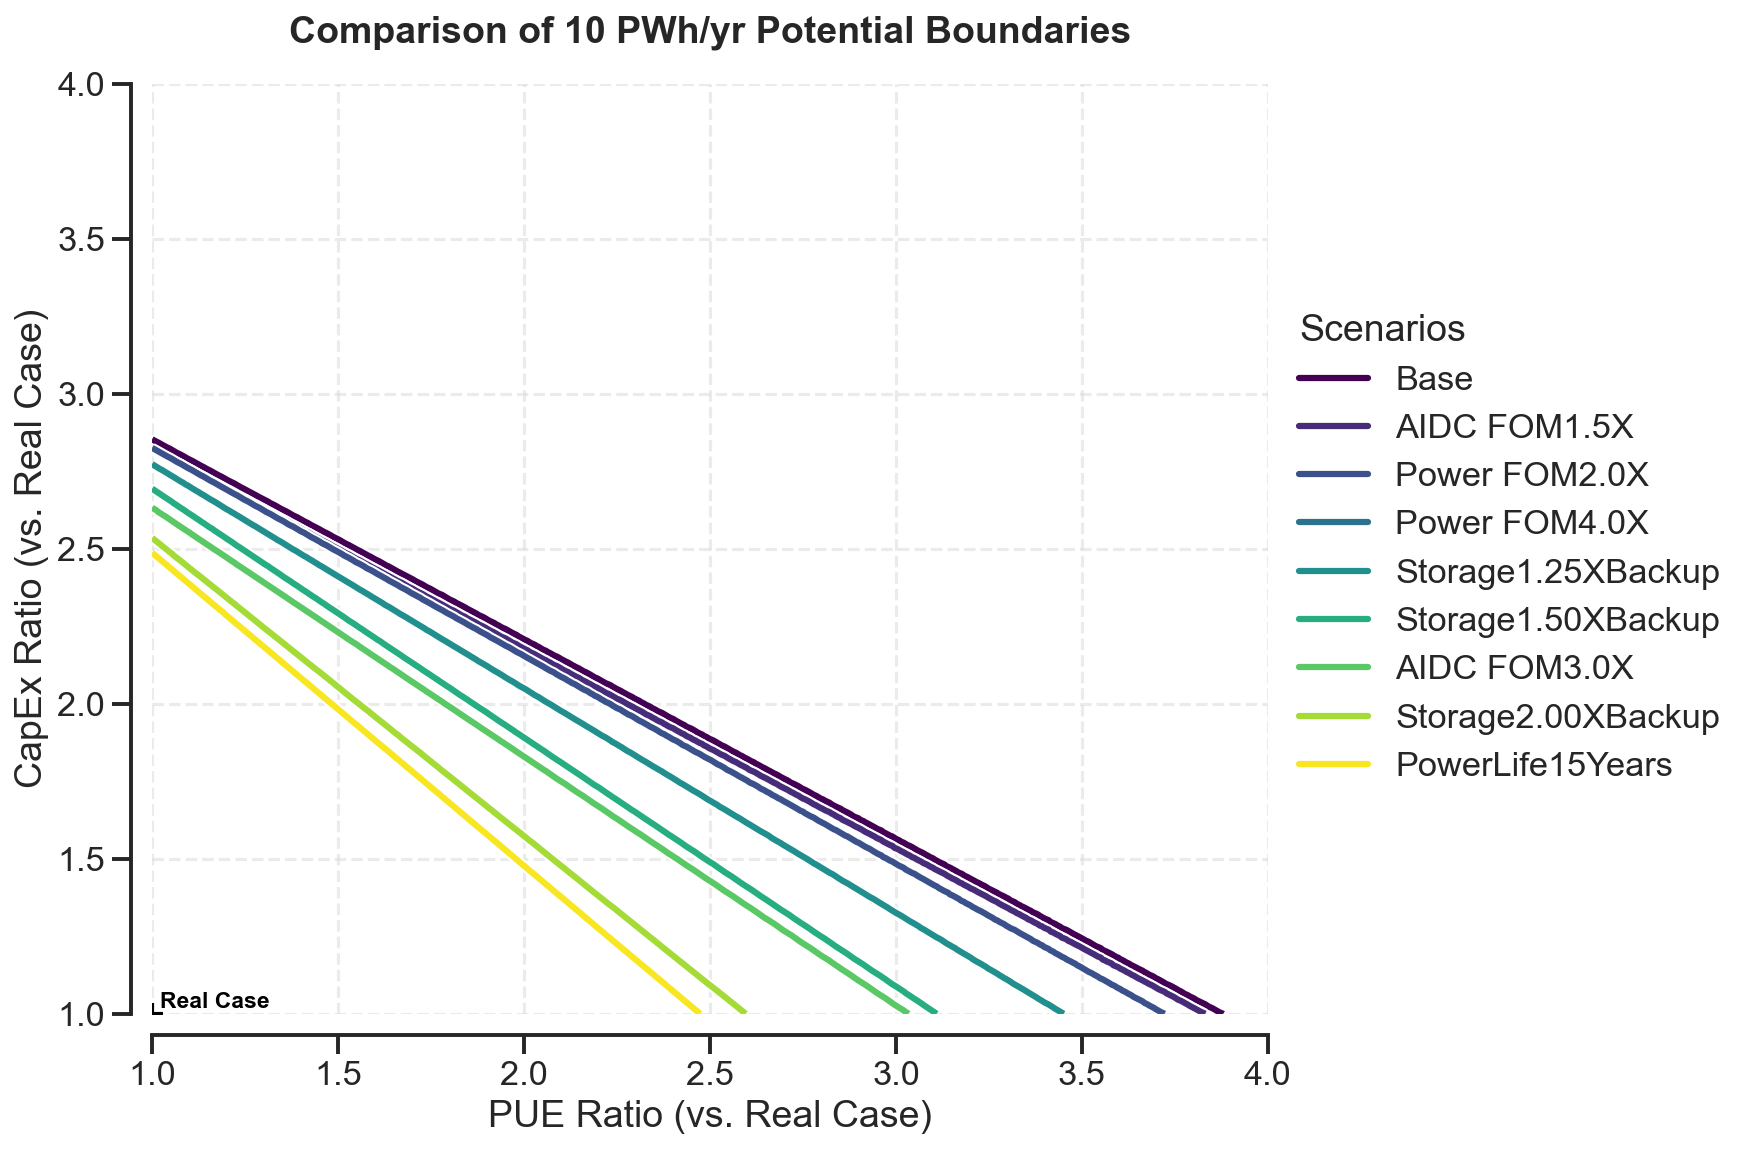

In [7]:
plot_gradient_contours(scenarios)